 1. 读取CSV文件并设置编码

In [1]:
import pandas as pd

def read_csv_with_encoding(file_path):
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
        print("读取数据成功，编码为 utf-8")
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='gbk')
        print("读取数据成功，编码为 gbk")
    return data

# # 替换为你的CSV文件路径
# file_path = '../最后导出修改列名\工业用地_修改后.csv'
# file_path = '../最后导出修改列名\商业用地_修改后.csv'
# file_path = '../最后导出修改列名\公服用地_修改后.csv'
# file_path = '../最后导出修改列名\住宅用地_修改后.csv'
# file_path = '../最后导出修改列名\草地_修改后.csv'
# file_path = '../最后导出修改列名\林地_修改后.csv'
# file_path = '../最后导出修改列名\耕地_修改后.csv'
# file_path = '../最后导出修改列名\园地_修改后.csv'
# file_path = '../最后导出修改列名\园地_修改后.csv'
# file_path = '../最后导出修改列名\设施农用地_修改后.csv'
file_path = '../最后导出修改列名\坑塘水面_修改后.csv'
data = read_csv_with_encoding(file_path)
data.head(5)


d:\miniconda3\envs\arcgispro-py3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


读取数据成功，编码为 utf-8


,pointID,Y,clas,距五金、机电、仪器仪表的距离,距行业性团体的距离,距汽车销售及服务的距离,距法院的距离,距商务服务的距离,距办公服务的距离,距区县级地名的距离,...,科研及技术服务POI核密度,道路密度,餐饮POI核密度,现状电网线路_hmd,RD-03-1-干线主干路_hmd,轨道1号线_hmd,现状220k伏埋地电缆_hmd,住、宿POI核密度,木材加工核密度,轨道S1号线_hmd
0,0,7.2050,坑塘水面,3503.849873,22560.536002,4535.017817,12464.743994,4329.497187,3370.855357,27616.121001,...,0.0,5.466753,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,7.7991,坑塘水面,3146.814401,22727.784151,4180.845779,12141.492889,3989.765389,3015.193672,27264.746721,...,0.0,5.407507,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,7.5215,坑塘水面,2537.077492,21646.907861,3594.077699,11833.246137,3717.990284,2502.558112,26501.650076,...,0.0,6.182797,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,6.4338,坑塘水面,2812.596438,22436.126589,3687.326575,11238.668017,3289.370499,2632.951925,26591.958423,...,0.0,3.678584,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4,6.3549,坑塘水面,2197.351990,21798.445865,3049.648813,10675.164611,2659.696151,2012.596498,25974.023901,...,0.0,4.367639,0.0,0.0,3.126744,0.0,0.0,0.0,0.0,0.0


2. 数据无量纲化

In [51]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Normalizer
# scaler = MinMaxScaler()
# data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# data_scaled.head(5)


3. 数据标准化

In [52]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# data_standardized.head()


4. 数据归一化

In [53]:
# from sklearn.preprocessing import Normalizer

# scaler = Normalizer()
# data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# data_normalized.head()



5. 删除特征

In [2]:
# 在这里添加你要删除的特征名称
# 工业用地需要删除的特征
#features_to_delete = ["距三家公路的距离", "距公路未分级的距离", "距其他的距离", "距南宁市地下水位标高点位的距离", "距大架修的距离"]
features_to_delete = ["clas"]
# 工业用地需要重命名的特征
rename_dict = {
    "距国家级的距离": "距国家级道路的距离",
    "距自治区级的距离": "距自治区级道路的距离",
    "距县级的距离": "距县级道路的距离",
    "距省级的距离": "距省级道路的距离",
    "距市级的距离": "距市级道路的距离"
}

# 删除特征
data = data.drop(columns=features_to_delete)

# 重命名特征
data = data.rename(columns=rename_dict)

data.head(5)

,pointID,Y,距五金、机电、仪器仪表的距离,距行业性团体的距离,距汽车销售及服务的距离,距法院的距离,距商务服务的距离,距办公服务的距离,距区县级地名的距离,距乡、镇政府的距离,...,科研及技术服务POI核密度,道路密度,餐饮POI核密度,现状电网线路_hmd,RD-03-1-干线主干路_hmd,轨道1号线_hmd,现状220k伏埋地电缆_hmd,住、宿POI核密度,木材加工核密度,轨道S1号线_hmd
0,0,7.2050,3503.849873,22560.536002,4535.017817,12464.743994,4329.497187,3370.855357,27616.121001,10611.476904,...,0.0,5.466753,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,7.7991,3146.814401,22727.784151,4180.845779,12141.492889,3989.765389,3015.193672,27264.746721,10858.644116,...,0.0,5.407507,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,7.5215,2537.077492,21646.907861,3594.077699,11833.246137,3717.990284,2502.558112,26501.650076,10834.195461,...,0.0,6.182797,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,6.4338,2812.596438,22436.126589,3687.326575,11238.668017,3289.370499,2632.951925,26591.958423,11139.145009,...,0.0,3.678584,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4,6.3549,2197.351990,21798.445865,3049.648813,10675.164611,2659.696151,2012.596498,25974.023901,10565.204908,...,0.0,4.367639,0.0,0.0,3.126744,0.0,0.0,0.0,0.0,0.0


6. 相关性分析并生成热力图

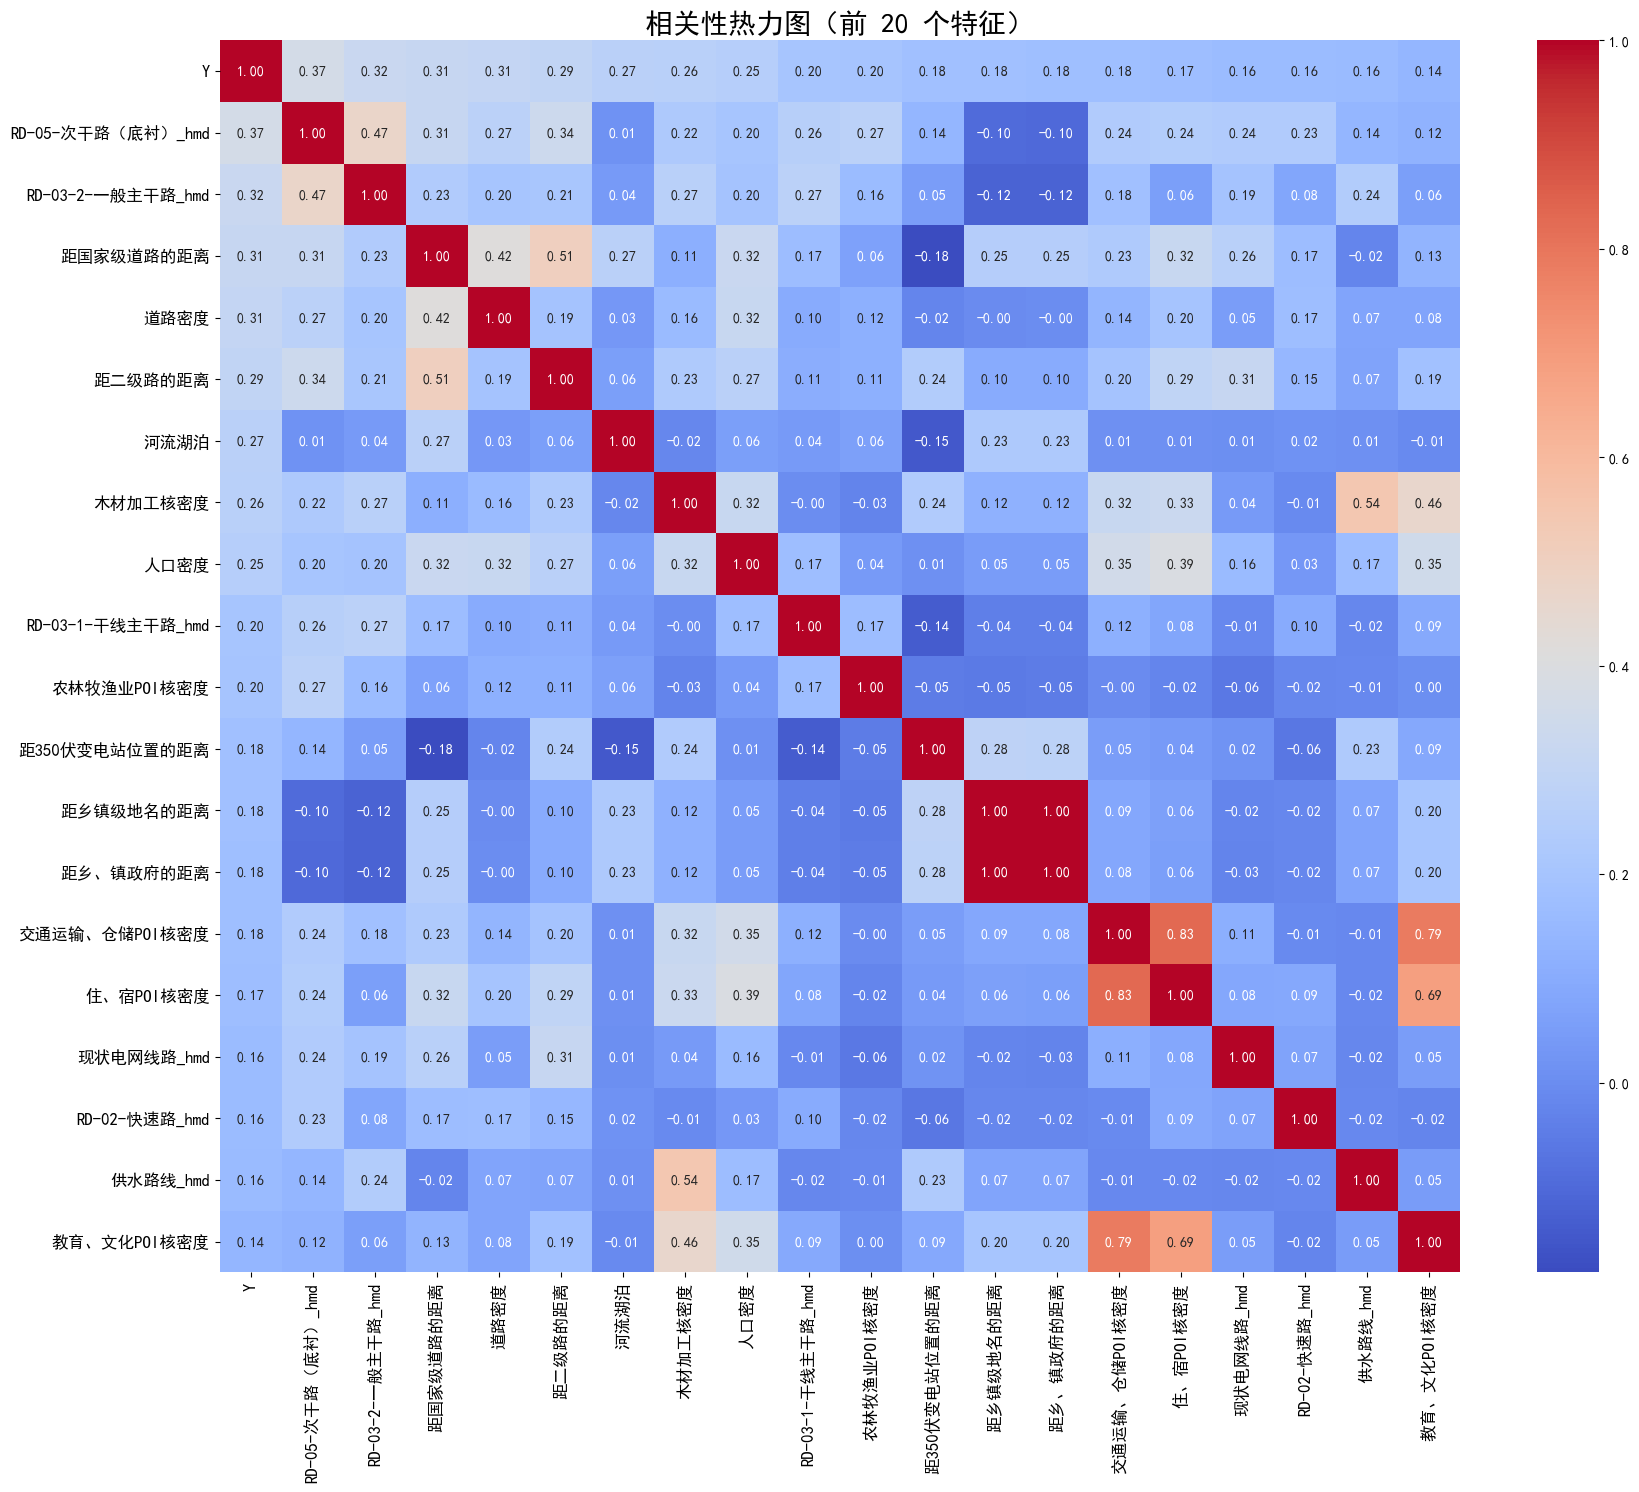

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def plot_heatmap(data, num_features):
    # 计算相关性矩阵
    corrmat = data.corr()
    
    # 选择相关性最高的前 num_features 个特征
    cols = corrmat.nlargest(num_features, 'Y')['Y'].index
    
    # 计算这些特征的相关性矩阵
    cm = np.corrcoef(data[cols].values.T)
    
    # 生成热力图
    plt.figure(figsize=(20, 16))
    sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='coolwarm')
    plt.title(f'相关性热力图（前 {num_features} 个特征）', fontsize=20)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.show()

# 调用函数，设置特征值数量生成热力图
plot_heatmap(data, num_features=20)


7. 筛选高相关性特征并保存

In [57]:
# 设置相关性阈值
corr_threshold = 0
corrmat = data.corr()
# 筛选与目标变量（假设目标变量名为 'Y'）相关性高于阈值的特征
corr_with_target = corrmat['Y'].drop('Y')
high_corr_features = corr_with_target[abs(corr_with_target) > corr_threshold].index.tolist()

# 保留高相关性的特征，并将 pointID 和 OBJECTID 放在前面
filtered_data = data[["Y"] + high_corr_features]
# filtered_data.drop(columns=['pointID'])
# 保存筛选后的数据到新的CSV文件
# filtered_data.to_csv('../特征工程处理csv/工业用地.csv', index=False, encoding='utf-8')
# filtered_data.to_csv('../特征工程处理csv/商业用地.csv', index=False, encoding='utf-8')
# filtered_data.to_csv('../特征工程处理csv/公服用地.csv', index=False, encoding='utf-8')
# filtered_data.to_csv('../特征工程处理csv/住宅用地.csv', index=False, encoding='utf-8')
# filtered_data.to_csv('../特征工程处理csv/草地用地.csv', index=False, encoding='utf-8')
# filtered_data.to_csv('../特征工程处理csv/林地用地.csv', index=False, encoding='utf-8') 
# filtered_data.to_csv('../特征工程处理csv/耕地.csv', index=False, encoding='utf-8') 
# filtered_data.to_csv('../特征工程处理csv/设施农用地.csv', index=False, encoding='utf-8') 
filtered_data.to_csv('../特征工程处理csv/坑塘水面.csv', index=False, encoding='utf-8') 
filtered_data.head()  


,Y,pointID,距五金、机电、仪器仪表的距离,距行业性团体的距离,距汽车销售及服务的距离,距法院的距离,距商务服务的距离,距办公服务的距离,距区县级地名的距离,距乡、镇政府的距离,...,气温数据,河流湖泊,科研及技术服务POI核密度,道路密度,餐饮POI核密度,现状电网线路_hmd,RD-03-1-干线主干路_hmd,住、宿POI核密度,木材加工核密度,轨道S1号线_hmd
0,7.2050,0,3503.849873,22560.536002,4535.017817,12464.743994,4329.497187,3370.855357,27616.121001,10611.476904,...,227833328.0,1.298834,0.0,5.466753,0.0,0.0,0.000000,0.0,0.0,0.0
1,7.7991,1,3146.814401,22727.784151,4180.845779,12141.492889,3989.765389,3015.193672,27264.746721,10858.644116,...,227833328.0,1.301671,0.0,5.407507,0.0,0.0,0.000000,0.0,0.0,0.0
2,7.5215,2,2537.077492,21646.907861,3594.077699,11833.246137,3717.990284,2502.558112,26501.650076,10834.195461,...,228083328.0,1.380036,0.0,6.182797,0.0,0.0,0.000000,0.0,0.0,0.0
3,6.4338,3,2812.596438,22436.126589,3687.326575,11238.668017,3289.370499,2632.951925,26591.958423,11139.145009,...,227083328.0,1.071092,0.0,3.678584,0.0,0.0,0.000000,0.0,0.0,0.0
4,6.3549,4,2197.351990,21798.445865,3049.648813,10675.164611,2659.696151,2012.596498,25974.023901,10565.204908,...,228000000.0,0.950666,0.0,4.367639,0.0,0.0,3.126744,0.0,0.0,0.0


### 不进行任何特征筛选

In [5]:
all_features = data.columns.tolist()
all_features.remove('pointID')
all_features.remove('Y')

# 如果要保留所有特征，不使用高相关性筛选
# filtered_data = data[["pointID", "Y"] + high_corr_features]

# 保留所有特征，确保 pointID 和 Y 列在前面
filtered_data = data[["pointID", "Y"] + all_features]

# 保存筛选后的数据到新的CSV文件
filtered_data.to_csv('../特征工程处理csv/坑塘水面.csv', index=False, encoding='utf-8')
filtered_data.head()

,pointID,Y,距五金、机电、仪器仪表的距离,距行业性团体的距离,距汽车销售及服务的距离,距法院的距离,距商务服务的距离,距办公服务的距离,距区县级地名的距离,距乡、镇政府的距离,...,科研及技术服务POI核密度,道路密度,餐饮POI核密度,现状电网线路_hmd,RD-03-1-干线主干路_hmd,轨道1号线_hmd,现状220k伏埋地电缆_hmd,住、宿POI核密度,木材加工核密度,轨道S1号线_hmd
0,0,7.2050,3503.849873,22560.536002,4535.017817,12464.743994,4329.497187,3370.855357,27616.121001,10611.476904,...,0.0,5.466753,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,7.7991,3146.814401,22727.784151,4180.845779,12141.492889,3989.765389,3015.193672,27264.746721,10858.644116,...,0.0,5.407507,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,7.5215,2537.077492,21646.907861,3594.077699,11833.246137,3717.990284,2502.558112,26501.650076,10834.195461,...,0.0,6.182797,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,6.4338,2812.596438,22436.126589,3687.326575,11238.668017,3289.370499,2632.951925,26591.958423,11139.145009,...,0.0,3.678584,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4,6.3549,2197.351990,21798.445865,3049.648813,10675.164611,2659.696151,2012.596498,25974.023901,10565.204908,...,0.0,4.367639,0.0,0.0,3.126744,0.0,0.0,0.0,0.0,0.0
